In [9]:
from mpmath import re
from src.prepare_data import load_data_for_demographic, get_referendums, get_GPT_referendum_data_correlation, get_referendum_topics, get_GPT_data
from src.prepare_data import parties, party_colors, languages

ImportError: cannot import name 'get_GPT_data' from 'src.prepare_data' (/Users/acapozzi/Desktop/FB_ads/repo/swiss_online_politial_ads/src/prepare_data.py)

In [2]:
from src.models import run_full_analysis, test_stat
from src.plot_functions import plot_gam_subplots, plot_boxplot

In [3]:
df = load_data_for_demographic(data_folder='data')

40044
34559


In [4]:
referendums = get_referendums(data_folder='data')
len(referendums)

22

In [5]:
referendum_topics = get_referendum_topics(data_folder='data')

In [6]:
spending_results, impressions_results, analysis_window_days = run_full_analysis(df=df, referendums=referendums)

Starting full analysis loop...

####################################################
--- Analyzing Languages: ['italian'] (as 'italian') ---
####################################################


===== ANALYSIS FOR: SPENDING =====

--- Performing Paired Analysis (Wilcoxon Signed-Rank Test) ---
Wilcoxon signed-rank test (n=420 pairs): Statistic=56917.000, p-value=6.70539314568449e-08

--- Performing GAM (Generalized Additive Model) Analysis for ITALIAN Spending (Window: +/- 30 days) ---
Engineering GAM features (days_to_ref, seasonality, trend)...
Fitting GAM on 882 data points...
Calculating partial dependence for 'days_to_ref'...


===== ANALYSIS FOR: IMPRESSIONS =====

--- Performing Paired Analysis (Wilcoxon Signed-Rank Test) ---
Wilcoxon signed-rank test (n=420 pairs): Statistic=56701.000, p-value=1.1144932902356496e-07

--- Performing GAM (Generalized Additive Model) Analysis for ITALIAN Impressions (Window: +/- 30 days) ---
Engineering GAM features (days_to_ref, seasonality, tren


--- Generating 2x2 Combined Subplots ---


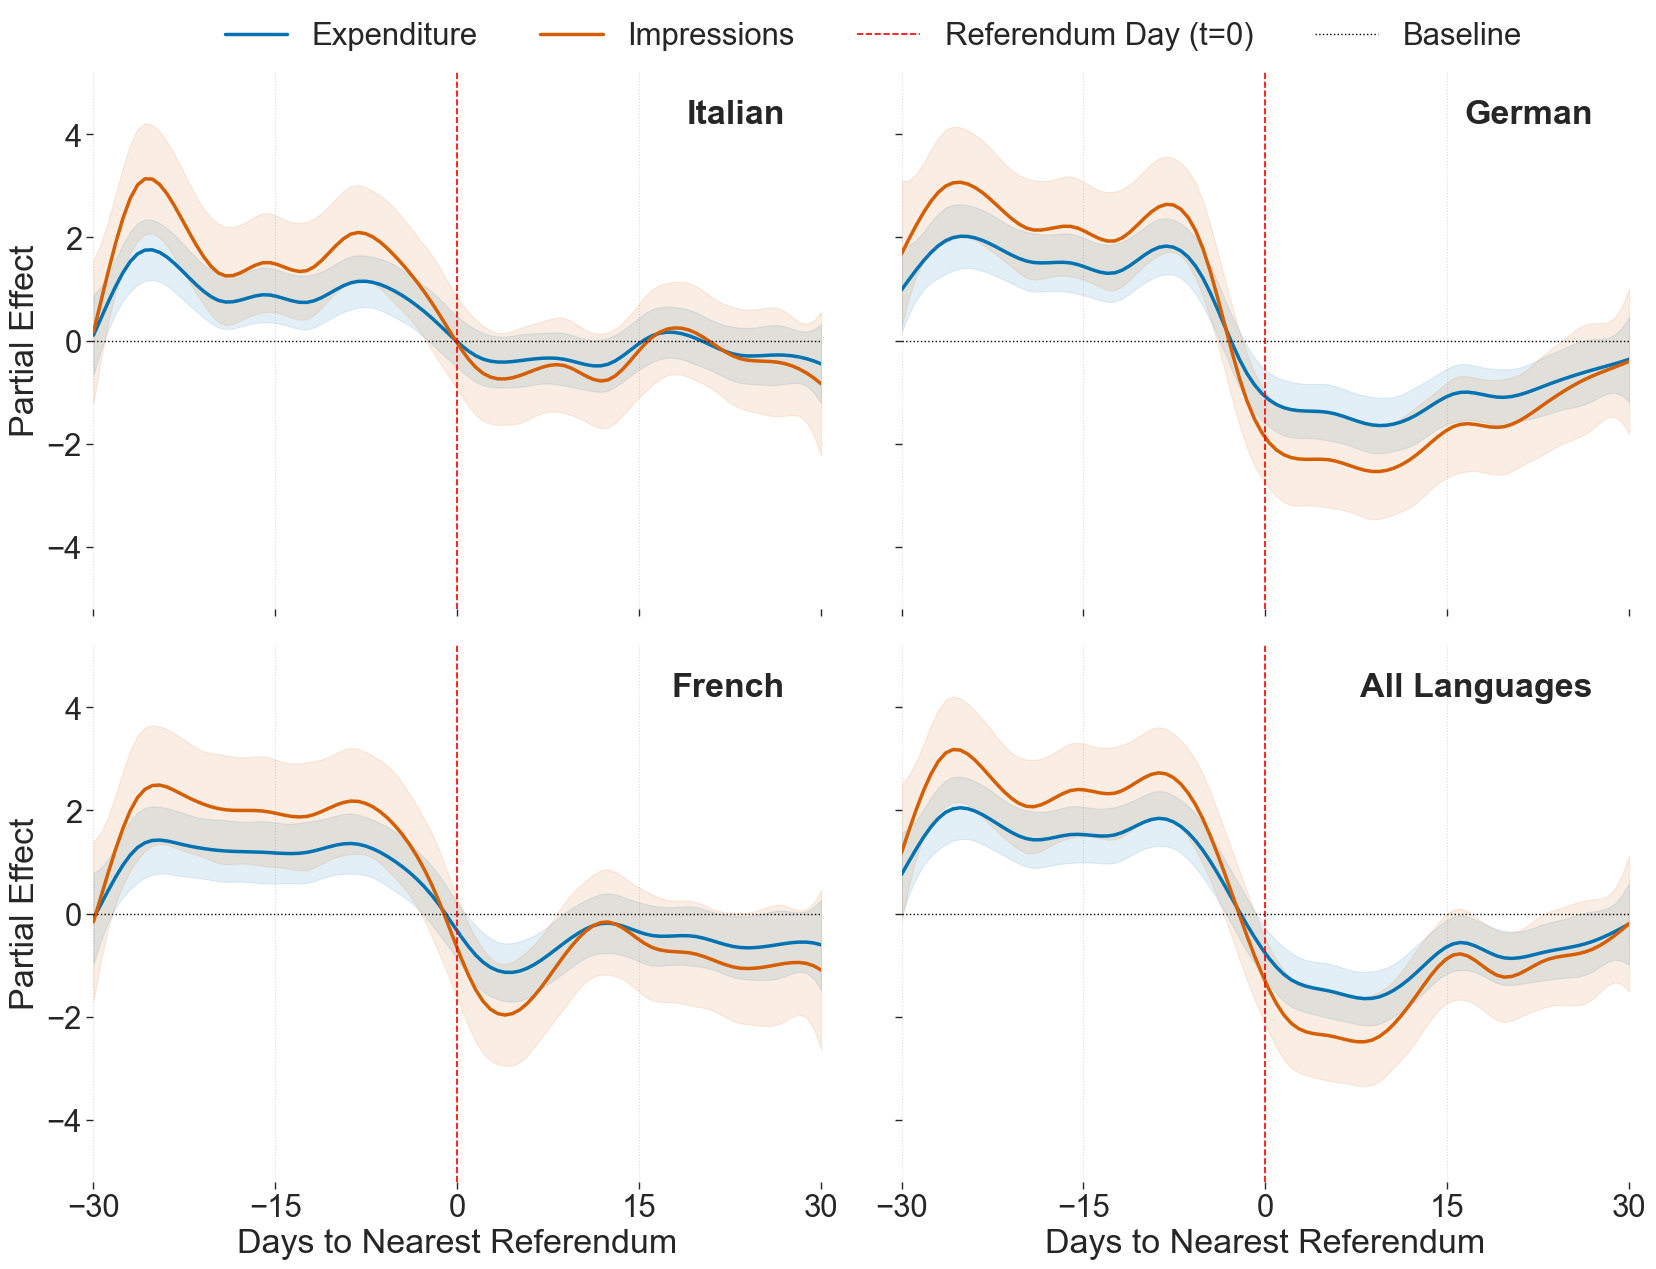

In [7]:
plot_gam_subplots(spending_results, impressions_results, window_days=30, output_dir='imgs', save=False)

In [10]:
referendum_ads_votes = get_GPT_referendum_data_correlation(df, data_folder='data', ref_data=referendum_topics, referendums=referendums)

Processing GPT Answers: 100%|██████████| 14/14 [00:00<00:00, 249.65it/s]


Processing referendum date: March 7, 2021
Processing referendum date: June 13, 2021
Processing referendum date: September 26, 2021
Processing referendum date: November 28, 2021
Processing referendum date: February 13, 2022
Processing referendum date: May 15, 2022
Processing referendum date: September 25, 2022
Processing referendum date: June 18, 2023
Processing referendum date: March 3, 2024
Processing referendum date: June 9, 2024
Processing referendum date: September 22, 2024
Processing referendum date: November 24, 2024
Processing referendum date: February 9, 2025
Processing referendum date: September 28, 2025


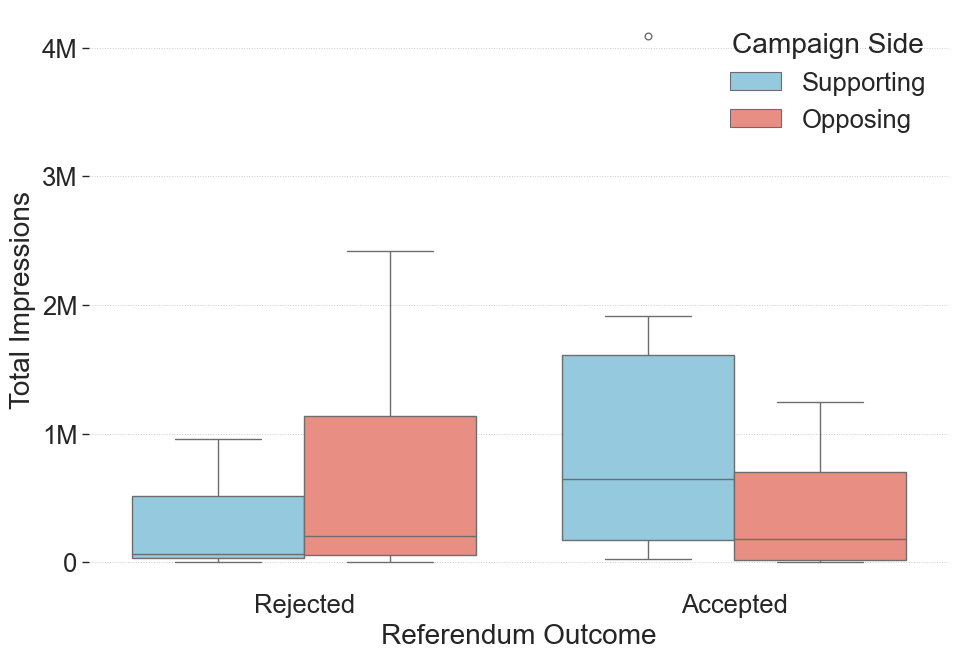

In [11]:
plot_boxplot(referendum_ads_votes[referendum_ads_votes['ADs']>4].copy(), save=False)


In [12]:
test_stat(referendum_ads_votes[referendum_ads_votes['ADs']>4].copy())

--- Statistical Test Results ---

Test 1: Are 'Impressions yes' significantly higher for approved referendums?
Mann-Whitney U statistic: 146.00
P-value: 0.0135
Result: The difference is statistically significant. We reject the null hypothesis.

Test 2: Are 'Impressions no' significantly higher for non-approved referendums?
Mann-Whitney U statistic: 118.00
P-value: 0.1783
Result: The difference is not statistically significant. We fail to reject the null hypothesis.
